# Importing packages 

In [1]:
# OS traversal
import os

# System functionalities
import sys

# Adding the whole project to module paths
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Data wrangling 
import pandas as pd 

# Ploting 
import matplotlib.pyplot as plt

# Regression boosting
from regression.boosting import RegressionGB

# Reading data 

In [2]:
d = pd.read_csv('data/auto-mpg.csv')

print(f"Shape of data: {d.shape}")

Shape of data: (398, 9)


# Ploting the data 

The $\mathbb{Y}$ variable is mpg - miles per galon. 

The $\mathbb{X}$ variable is the car weight.

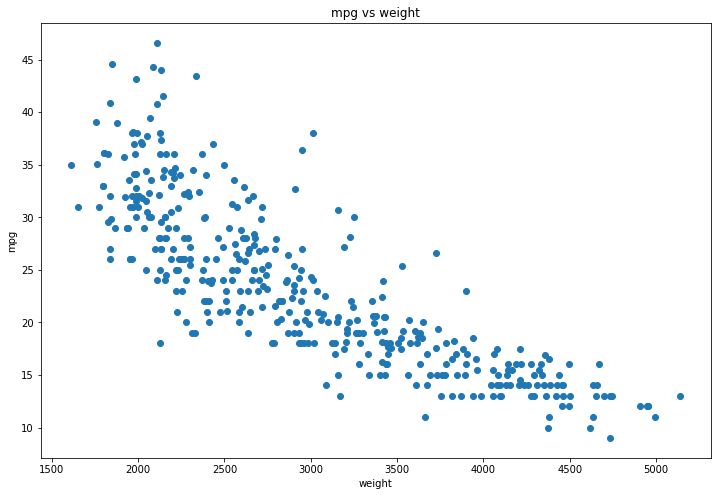

In [3]:


plt.figure(figsize=(12, 8))
plt.plot(d[x], d[y], 'o')
plt.title('mpg vs weight')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

# Gradient boosting 

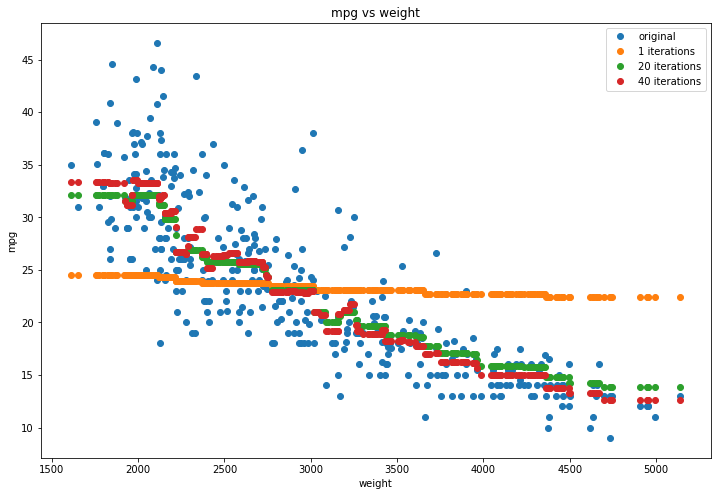

In [15]:
y = 'mpg'
x = 'weight'

# Ploting all the points 
plt.figure(figsize=(12, 8))
plt.plot(d[x], d[y], 'o', label='original')

# Defining the number of iterations
_m_iterations = [
    1, 
    20,
    40,
]

for _m in _m_iterations:
    # Initiating the tree
    rgb = RegressionGB(
        d,
        y,
        [x],
        max_depth=3, 
        min_sample_leaf=10,
        learning_rate=0.1,
    )

    # Fitting on data 
    rgb.fit(m=_m)

    # Predicting 
    _input = [{x: y.get(x)} for y in d.to_dict('records')]
    yhat = [rgb.predict(y) for y in _input]

    # Saving the predictions to the training set 
    d['yhat'] = yhat

    plt.plot(d[x], d['yhat'], 'o', label=f'{_m} iterations')
    plt.title('mpg vs weight')

plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend()
plt.show()